<a href="https://colab.research.google.com/github/knitinsingh/AI_City_challenge/blob/master/Tuscan_kitchen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install icrawler

In [0]:
import pathlib,os
import fastai
from fastai.vision import *
from fastai.callbacks import *
import torch, torchvision
import torchvision.transforms.functional as F
from icrawler.builtin import GoogleImageCrawler
import os
from sklearn.metrics import average_precision_score

In [0]:
# os.mkdir('/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen')


In [0]:
# os.makedirs('/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Tuscan_kitchen')


In [0]:
# os.makedirs('/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Open_kitchen')


In [0]:
Tuscan_kitchen = '/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Tuscan_kitchen'
Open_kitchen = '/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Open_kitchen'

In [0]:
google_crawler = GoogleImageCrawler(storage={'root_dir': 'gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Tuscan_kitchen'})
google_crawler.crawl(keyword='Tuscan kitchen', max_num=200, overwrite=True)

In [0]:
google_crawler = GoogleImageCrawler(storage={'root_dir': 'gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Open_kitchen'})
google_crawler.crawl(keyword='Open kitchen', max_num=200, overwrite=True)

In [0]:
Tuscan_kitchen = '/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Tuscan_kitchen'
Open_kitchen = '/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen/Open_kitchen'

In [0]:
path = Path('/content/gdrive/My Drive/ai_fellowship/Faux-paus-Tuscan_kitchen')


In [11]:
pos_dir = Path(Tuscan_kitchen)
neg_dir = Path(Open_kitchen)
pos_imgs = get_image_files(pos_dir)
neg_imgs = get_image_files(neg_dir)
len(pos_imgs), len(neg_imgs)

(172, 170)

In [0]:
tfms = get_transforms(do_flip=False)

src = (ImageList.from_folder(path)
      .split_by_rand_pct(0.2)
      .label_from_folder())
data = (src.transform(tfms, size=224, resize_method=ResizeMethod.SQUISH)
       .databunch(bs=64))

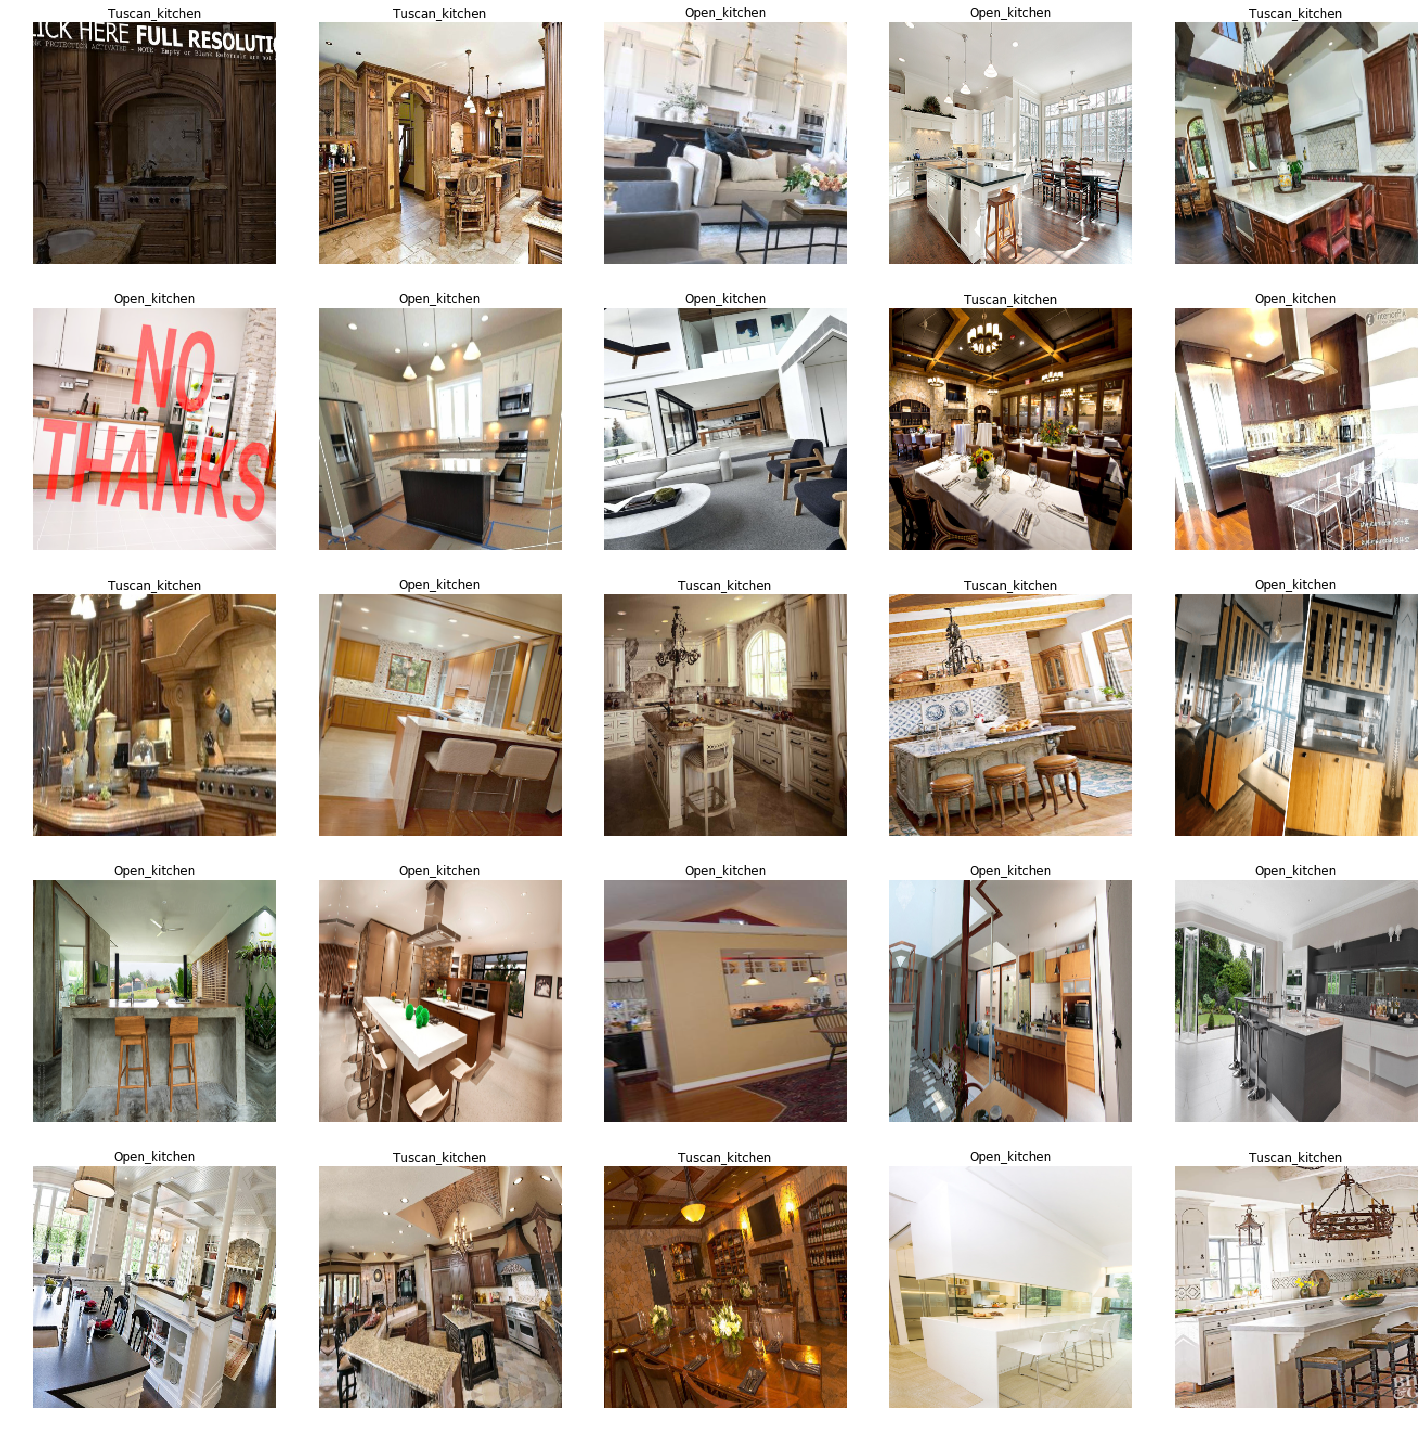

In [13]:
data.show_batch()


In [14]:
data.classes


['Open_kitchen', 'Tuscan_kitchen']

In [0]:
def PRAUC(inp, target): return tensor([average_precision_score(target, tensor(inp.max(1)[0]))])[0]


In [0]:
learn = cnn_learner(data, models.resnet34, pretrained=True, metrics=[accuracy,FBeta(),PRAUC])


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-03
Min loss divided by 10: 1.45E-02


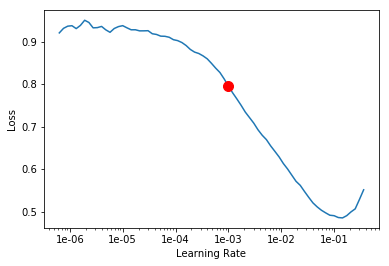

In [17]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [18]:
lr = 1e-04
learn.fit_one_cycle(20, slice(lr), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='Tuscan_kitchen')])

Better model found at epoch 0 with accuracy value: 0.45588234066963196.
Better model found at epoch 1 with accuracy value: 0.5.
Better model found at epoch 2 with accuracy value: 0.5441176295280457.
Better model found at epoch 3 with accuracy value: 0.5882353186607361.
Better model found at epoch 4 with accuracy value: 0.6764705777168274.
Better model found at epoch 7 with accuracy value: 0.7058823704719543.
Better model found at epoch 8 with accuracy value: 0.7352941036224365.
Better model found at epoch 9 with accuracy value: 0.7647058963775635.
Better model found at epoch 10 with accuracy value: 0.8235294222831726.
Better model found at epoch 12 with accuracy value: 0.8529411554336548.


In [0]:
learn.save('Tuscan_kitchen')
learn.export()


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

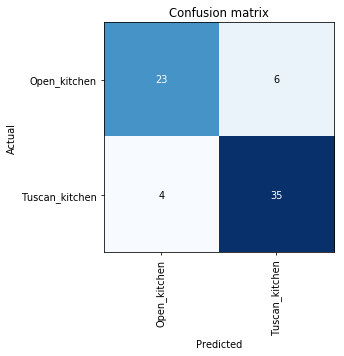

In [21]:
interp.plot_confusion_matrix(figsize=(5, 5), dpi=70)

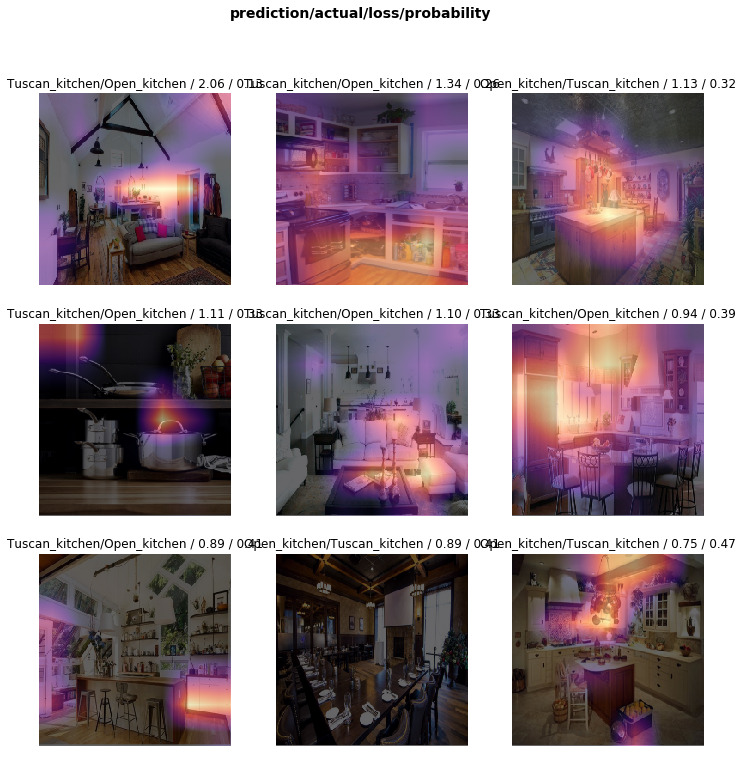

In [22]:
interp.plot_top_losses(9, heatmap = True)

In [23]:
len(learn.data.dataset)


274

In [25]:
GSExporter(learn).export(print_o=True)

Saving model..
Creating .classes file..
Copying 342 images..
Creating labels files....
Uploading files to Google Storage..
